In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
#Get the data
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")

y = df_train["ViolentCrimesPerPop"].values
y_test = df_test["ViolentCrimesPerPop"].values
x = df_train.drop("ViolentCrimesPerPop", axis = 1).values
x_test = df_test.drop("ViolentCrimesPerPop", axis = 1).values
(n,d) = x_train.shape
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
idx1 = df_train.drop("ViolentCrimesPerPop", axis = 1).columns.get_loc("agePct12t29")
idx2 = df_train.drop("ViolentCrimesPerPop", axis = 1).columns.get_loc("pctWSocSec")
idx3 = df_train.drop("ViolentCrimesPerPop", axis = 1).columns.get_loc("pctUrban")
idx4 = df_train.drop("ViolentCrimesPerPop", axis = 1).columns.get_loc("agePct65up")
idx5 = df_train.drop("ViolentCrimesPerPop", axis = 1).columns.get_loc("householdsize")
idx = [idx1, idx2, idx3, idx4, idx5]
print(idx)

(1595, 95)
(1595,)
(399,)
[3, 12, 7, 5, 1]


In [33]:
def CDA_better(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.ones((d,))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - w@x.T)
        a = 2*np.sum(np.abs(x)**2,axis=0)
        for k in range(d):
            x_new = np.append(x[:,:k], x[:,k+1:], axis = 1)
            w_new = np.append(w[:k], w[k+1:])
            ck = 2 * np.sum(x[:,k] @ (y - (b + w_new@x_new.T)))
            if(ck < -lam):
                w[k] = (ck+lam)/(a[k])
            elif (ck>lam):
                w[k] = (ck-lam)/(a[k])
            else:
                w[k] = 0
                
                
        #Check if converged
        diff = np.max(np.abs(w - w_prev))
        if( np.max(np.abs(w - w_prev)) < delta):
            return w
#         if(count > 1000):
#             print("count stopped it")
#             return w
        count += 1
        
        w_prev = np.copy(w)

In [34]:
def find_lam_max(x, y, d):
    lam_max_list = np.zeros(d)
    for k in range(d):
        summation = 0
        for i in range(n):
            summation += x[i,k] * (y[i] - np.mean(y))*2
        lam_max_list[k] = summation
    return np.max(lam_max_list)


In [35]:
def error(truth, pred):
    mse = np.mean((truth - pred)**2)
    return mse

In [36]:
w[idx]

array([-0.02912824,  0.        ,  0.01736091,  0.00852797,  0.00655093])

In [39]:

scale_fac = 2
num_nonzero_list = []
lam_list = []
mse_train_list = []
mse_test_list = []
weights = []


lam = find_lam_max(x, y, d)
print(lam)

i = 0
num_nonzero = 0
while lam > 0.01:
    print(i)
    i += 1
    w = CDA_better(x, y, lam, delta = 1e-3)
    
    pred_train = w@x.T
    pred_test = w@x_test.T
    mse_train_list.append(error(y, pred_train))
    mse_test_list.append(error(y_test, pred_test))
    
    weights.append(w[idx])
    
    num_nonzero= np.count_nonzero(w)
    num_nonzero_list.append(num_nonzero)
    lam_list.append(lam)
    lam = lam/scale_fac
    
    print("num_nonzero_list = ", num_nonzero_list)
    print("lam_list = ", lam_list)
    print("weights = ", weights)
    print("mse_train_list = ", mse_train_list)
    print("mse_test_list = ", mse_test_list)



541.4826026332282
0
num_nonzero_list =  [1]
lam_list =  [541.4826026332282]
weights =  [array([0., 0., 0., 0., 0.])]
mse_train_list =  [0.10958369905956106]
mse_test_list =  [0.11610551378446107]
1
num_nonzero_list =  [1, 2]
lam_list =  [541.4826026332282, 270.7413013166141]
weights =  [array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.])]
mse_train_list =  [0.10958369905956106, 0.08587472193906685]
mse_test_list =  [0.11610551378446107, 0.09350920348390207]
2
num_nonzero_list =  [1, 2, 4]
lam_list =  [541.4826026332282, 270.7413013166141, 135.37065065830706]
weights =  [array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.])]
mse_train_list =  [0.10958369905956106, 0.08587472193906685, 0.07857305001065085]
mse_test_list =  [0.11610551378446107, 0.09350920348390207, 0.0867734362737652]
3
num_nonzero_list =  [1, 2, 4, 7]
lam_list =  [541.4826026332282, 270.7413013166141, 135.37065065830706, 67.68532532915353]
weights =  [array([0., 0., 0., 0., 0.]), arr

num_nonzero_list =  [1, 2, 4, 7, 12, 19, 27, 46, 61, 73, 85, 90]
lam_list =  [541.4826026332282, 270.7413013166141, 135.37065065830706, 67.68532532915353, 33.842662664576764, 16.921331332288382, 8.460665666144191, 4.2303328330720955, 2.1151664165360478, 1.0575832082680239, 0.5287916041340119, 0.26439580206700597]
weights =  [array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([-0.00206087,  0.        ,  0.00923903,  0.        ,  0.        ]), array([-0.00832658,  0.        ,  0.01256596,  0.        ,  0.        ]), array([-0.01525193,  0.        ,  0.01400085,  0.        ,  0.        ]), array([-0.01923826,  0.        ,  0.01606122,  0.00679475,  0.00184729]), array([-0.02912824,  0.        ,  0.01736091,  0.00852797,  0.00655093]), array([-0.03510484,  0.00233914,  0.01889358,  0.0115712 ,  0.00650344]), array([-0.03572923,  0.00239118,  0.01942894,  0.01174622,  0.00617209]), array([-0.03169748,  0.00077376,  0.019

[541.4826026332282, 270.7413013166141, 135.37065065830706, 67.68532532915353, 33.842662664576764, 16.921331332288382, 8.460665666144191, 4.2303328330720955, 2.1151664165360478, 1.0575832082680239, 0.5287916041340119, 0.26439580206700597, 0.13219790103350298, 0.06609895051675149, 0.033049475258375746, 0.016524737629187873]
[1, 2, 4, 7, 12, 19, 27, 46, 61, 73, 85, 90, 93, 93, 94, 95]


Text(0.5, 1.0, 'Number of nonzero terms as regularization changes')

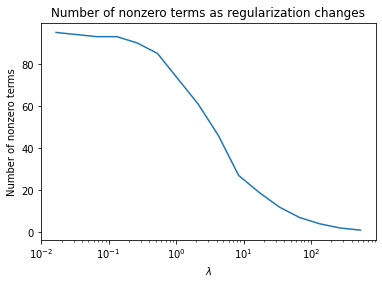

In [58]:

print(lam_list)
print(num_nonzero_list)
plt.plot(lam_list, num_nonzero_list)
plt.xlabel(r'$\lambda$')
plt.ylabel('Number of nonzero terms')
plt.xscale('log')
plt.title('Number of nonzero terms as regularization changes')

(16, 5)


Text(0.5, 1.0, 'Regularization paths for select variables')

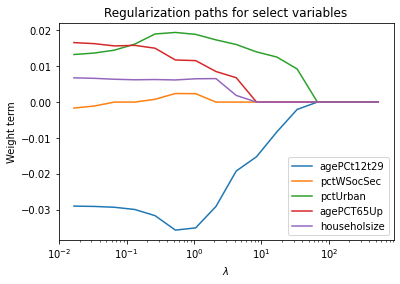

In [57]:
weights_np = np.array(weights)
print(weights_np.shape)
plt.plot(lam_list, weights_np[:,0], label = "agePCt12t29")
plt.plot(lam_list, weights_np[:,1], label = "pctWSocSec")
plt.plot(lam_list, weights_np[:,2], label = "pctUrban")
plt.plot(lam_list, weights_np[:,3], label = "agePCT65Up")
plt.plot(lam_list, weights_np[:,4], label = "householsize")
plt.legend()
plt.xlabel(r'$\lambda$')
plt.ylabel('Weight term')
plt.xscale('log')
plt.title('Regularization paths for select variables')

Text(0.5, 1.0, 'Mean Squared Error as regularization changes')

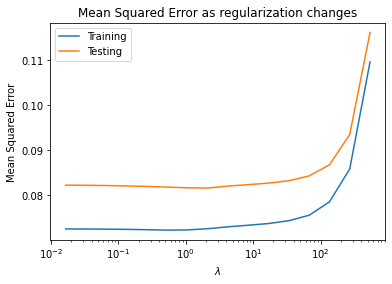

In [59]:
plt.plot(lam_list, mse_train_list, label = "Training")
plt.plot(lam_list, mse_test_list, label = "Testing")
plt.xlabel(r'$\lambda$')
plt.legend()
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.title('Mean Squared Error as regularization changes')
# plt.yscale('log')

In [68]:
#running for lambda = 30 for question d
# w = CDA_better(x, y, 30, delta = 1e-3)
print(w)
print("Max coefficient")
print(np.argmax(w))
print(df_train.drop("ViolentCrimesPerPop", axis = 1).columns[np.argmax(w)])
print("Min coefficient")
print(np.argmin(w))
print(df_train.drop("ViolentCrimesPerPop", axis = 1).columns[np.argmin(w)])

[ 0.          0.          0.         -0.00348378  0.          0.
  0.          0.01048151  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01144922  0.          0.
  0.          0.          0.         -0.06949211  0.          0.
  0.         -0.00589508  0.          0.0692029   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.03027494  0.          0.
  0.02048176 -0.0072364   0.          0.00087862  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.0156827   0.          0.          0.          0.
  0.          0.         